In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from portfolio import *

In [2]:
assets = ['imeu','ceu','smea']
assets = ['inaa','iusa','csspx']
assets = ['xgle', 'ibtm', 'ibgm', 'ibgl','em15']
assets = ['iusa','imeu','ibtm','xgle','phau']
assets = ['em15', 'ibtm', 'iusa', 'smea', 'phau']

In [3]:
df = read_quotes(assets)


In [4]:
# SALVA LE QUOTAZIONI su file
df.to_csv('quote_mach2.csv')

In [5]:
norm_df = df/df.iloc[0]

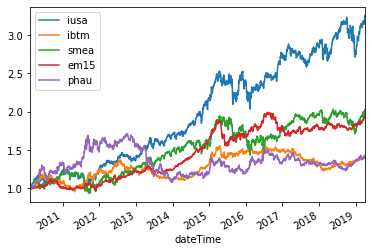

In [6]:
norm_df.plot()